In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
tRNA_df = pd.read_csv("tRNA.csv")
tRNA_df

,Unnamed: 0,Sequence Name,tRNA #,tRNA Begin,Bounds End,tRNA Type,AntiCodon,Intron Begin,Bounds End.1,Inf Score,Isotype CM,Isotype Score
0,0,Your-seq,1,225381,225457,I,GAT,0,0,75.8,Ile,110.9
1,1,Your-seq,2,225500,225575,A,TGC,0,0,78.1,Ala,115.6
2,2,Your-seq,3,228928,229004,D,GTC,0,0,85.5,Asp,128.1
3,3,Your-seq,4,236931,237007,D,GTC,0,0,85.5,Asp,128.1
4,4,Your-seq,5,262871,262946,T,CGT,0,0,85.1,Thr,105.6
...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Your-seq,85,696939,696865,Q,TTG,0,0,70.4,Gln,101.4
85,85,Your-seq,86,696830,696756,Q,TTG,0,0,70.4,Gln,101.4
86,86,Your-seq,87,696740,696664,M,CAT,0,0,84.4,Met,111.6
87,87,Your-seq,88,696616,696542,Q,CTG,0,0,70.8,Gln,100.0


In [ ]:
tRNA_df.groupby("AntiCodon")

,Unnamed: 0,Sequence Name,tRNA #,tRNA Begin,Bounds End,tRNA Type,AntiCodon,Intron Begin,Bounds End.1,Inf Score,Isotype CM,Isotype Score
0,0,Your-seq,1,225381,225457,I,GAT,0,0,75.8,Ile,110.9
1,1,Your-seq,2,225500,225575,A,TGC,0,0,78.1,Ala,115.6
2,2,Your-seq,3,228928,229004,D,GTC,0,0,85.5,Asp,128.1
3,3,Your-seq,4,236931,237007,D,GTC,0,0,85.5,Asp,128.1
4,4,Your-seq,5,262871,262946,T,CGT,0,0,85.1,Thr,105.6
...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Your-seq,85,696939,696865,Q,TTG,0,0,70.4,Gln,101.4
85,85,Your-seq,86,696830,696756,Q,TTG,0,0,70.4,Gln,101.4
86,86,Your-seq,87,696740,696664,M,CAT,0,0,84.4,Met,111.6
87,87,Your-seq,88,696616,696542,Q,CTG,0,0,70.8,Gln,100.0


In [53]:

tRNA_abundance = dict.fromkeys(tRNA_df["AntiCodon"].to_list())
tRNA_abundance = {k:tRNA_df["AntiCodon"].to_list().count(k) for k in tRNA_abundance.keys()}

tRNA_abundance

{'GAT': 3,
 'TGC': 3,
 'GTC': 3,
 'CGT': 2,
 'TCT': 1,
 'NNN': 2,
 'TTT': 6,
 'TAC': 5,
 'GAC': 2,
 'GTT': 4,
 'GGG': 1,
 'CCT': 1,
 'CAT': 8,
 'GAA': 2,
 'TCA': 1,
 'TTC': 4,
 'CCA': 1,
 'CCG': 1,
 'GTG': 1,
 'CAG': 4,
 'TGG': 1,
 'TGT': 1,
 'GTA': 3,
 'TCC': 1,
 'GGT': 2,
 'GCC': 4,
 'CAA': 1,
 'CGG': 1,
 'GAG': 1,
 'CCC': 1,
 'GCT': 1,
 'ACG': 4,
 'GGC': 2,
 'CGA': 1,
 'GCA': 1,
 'TAA': 1,
 'GGA': 2,
 'TGA': 1,
 'TAG': 1,
 'TTG': 2,
 'CTG': 2}

In [55]:
import numpy as np
import pandas as pd

def build_transition_matrix(tRNA_abundance):
    keys = list(tRNA_abundance.keys())
    abundances = np.array([tRNA_abundance[k] for k in keys])
    
    # Create matrix where each row is the abundance vector
    T = np.tile(abundances, (len(keys), 1))
    
    # Normalize each row (so rows sum to 1)
    T = T / T.sum(axis=1, keepdims=True)
    
    # Return as pandas DataFrame for readability (optional)
    return pd.DataFrame(T, index=keys, columns=keys)

# Example usage:
transition_matrix = build_transition_matrix(tRNA_abundance)
print(transition_matrix)


          GAT       TGC       GTC       CGT       TCT       NNN       TTT  \
GAT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
TGC  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
GTC  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
CGT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
TCT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
NNN  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
TTT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
TAC  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
GAC  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
GTT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
GGG  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   
CCT  0.033708  0.033708  0.033708  0.022472  0.011236  0.022472  0.067416   

In [12]:
tRNA_df[tRNA_df["tRNA Type"] == "Ala"]["AntiCodon"].to_list()

['TGC', 'TGC', 'TGC', 'GGC', 'GGC']

In [4]:
codon_df = pd.read_csv("codons.csv")
codon_df[codon_df["aminoacid"] == "T"]["codon"].to_list()

['ACA', 'ACC', 'ACG', 'ACT']

In [150]:
codon_to_aa = codon_df.groupby('codon')['aminoacid'].apply(list).to_dict()
codon_to_aa = {x:y[0] for x,y in codon_to_aa.items()}


In [ ]:
CodOvMatrix = pd.DataFrame(index=sorted(codon_df["codon"]), columns=sorted(codon_df["codon"]))
CodOvMatrix = CodOvMatrix.fillna(0)

/tmp/ipykernel_14292/3604813431.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CodOvMatrix = CodOvMatrix.fillna(0)


In [152]:
# I - Inosine (modif A)
TadA = True
# k2C - Lysidine
TilS = True
# xm5s2U: 5-(Carboxymethylaminomethyl)-2-thiouridine
mnmGorE = True
# xm5Um: 5-(Carboxymethylaminomethyl)-2′-O-methyluridine
TrmL = True
# Um: 2′-O-methyluridine
trmJ = True
# xm5U: 5-(Carboxymethylaminomethyl)uridine
trmA = True
# xo5U: 5-Hydroxyuridine
trhO = True

In [153]:
codon_tRNA_count = {x:0 for x in codon_df["codon"]}

In [ ]:
Wobble_pair = {
    "A":["T","C","G"],
    "T":["A","G","T"], # G not efficient + depended on base modif of U34
    "C":["G"], # confirmed
    "G":["C","T"], # confirmed 
    
    "I":["C","T"], # exceptionnaly A
    "k2C":["A"], # C34 of CAU tRNA Ile always modif
    "xm5s2U":["A"],
    "xm5Um":["A"],
    "Um":["A"],
    "xm5U": ["A"],
    "xo5U": ["T","A","G"]
}
from itertools import combinations as find_combi

for anticodon in tRNA_df["AntiCodon"]:
    try: 
        codon_base_pair = "".join([Wobble_pair[x][0] for x in anticodon][::-1])
        """
        print(f"A 5' - {anticodon} - 3'")
        print(f"C 3' - {codon_base_pair[::-1]} - 5'")
        print(f"C 5' - {codon_base_pair} - 3'\n")
        """
        # Normal wooble 
        WT_codons_reco  = [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair[anticodon[0]]]
        
        #Non-canonanical bases wooble 
        BM_codons_reco = []

        if TadA and anticodon[0] == "A":
            BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["I"]]
        if TilS and anticodon[0] == "C":
            BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["k2C"]]

        elif anticodon[0] == "T":
            if mnmGorE:
                BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["xm5s2U"]]
            if TrmL:
                BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["xm5Um"]]
            if trmJ:
                BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["Um"]]
            if trmA:
                BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["xm5U"]]
            if trhO:
                BM_codons_reco  += [f"{codon_base_pair[:-1]}{x}" for x in Wobble_pair["xo5U"]]
        
        WT_codons_reco = list(dict.fromkeys(WT_codons_reco))
        all_codon_reco = list(dict.fromkeys(WT_codons_reco + BM_codons_reco))

        for cod in all_codon_reco:
            codon_tRNA_count[cod] += 1

        WT_combi = find_combi(WT_codons_reco,2)
        all_combi = find_combi(all_codon_reco,2)

        for combi in WT_combi:
            codon1,codon2 = combi
            CodOvMatrix.loc[codon1,codon2] += 10
            CodOvMatrix.loc[codon2,codon1] += 10

        for combi in all_combi:
            if combi not in WT_combi:
                codon1,codon2 = combi
                CodOvMatrix.loc[codon1,codon2] += 2
                CodOvMatrix.loc[codon2,codon1] += 2


    except KeyError:
        print(f"[ERROR] with anticodon {anticodon}")


[ERROR] with anticodon NNN
[ERROR] with anticodon NNN


In [155]:
if False:
    heatmap_df.replace(0, pd.NA, inplace=True)
    heatmap_df = heatmap_df.dropna(axis=0, how='all')
    heatmap_df = heatmap_df.dropna(axis=1, how='all')
    heatmap_df.replace(pd.NA,0, inplace=True)

    for c in heatmap_df.index:
        heatmap_df.loc[c,c] = 0

In [156]:
multi_cols = pd.MultiIndex.from_tuples([(codon_to_aa[c], c) for c in CodOvMatrix.columns],names=('aa',"codon"))
multi_cols

display_heatmap_df = pd.DataFrame(CodOvMatrix)
display_heatmap_df.columns = multi_cols
display_heatmap_df.index = multi_cols

In [157]:
import pandas as pd

# Sample label splitting function
def split_label(label):
    aa, codon = label
    return aa, codon

# Extract labels
row_labels = display_heatmap_df.index
col_labels = display_heatmap_df.columns

# Create sorting keys
row_keys = sorted(row_labels, key=lambda x: (split_label(x)[0], split_label(x)[1]))
col_keys = sorted(col_labels, key=lambda x: (split_label(x)[0], split_label(x)[1]))

# Reorder DataFrame
display_heatmap_df_sorted = display_heatmap_df.loc[row_keys, col_keys]


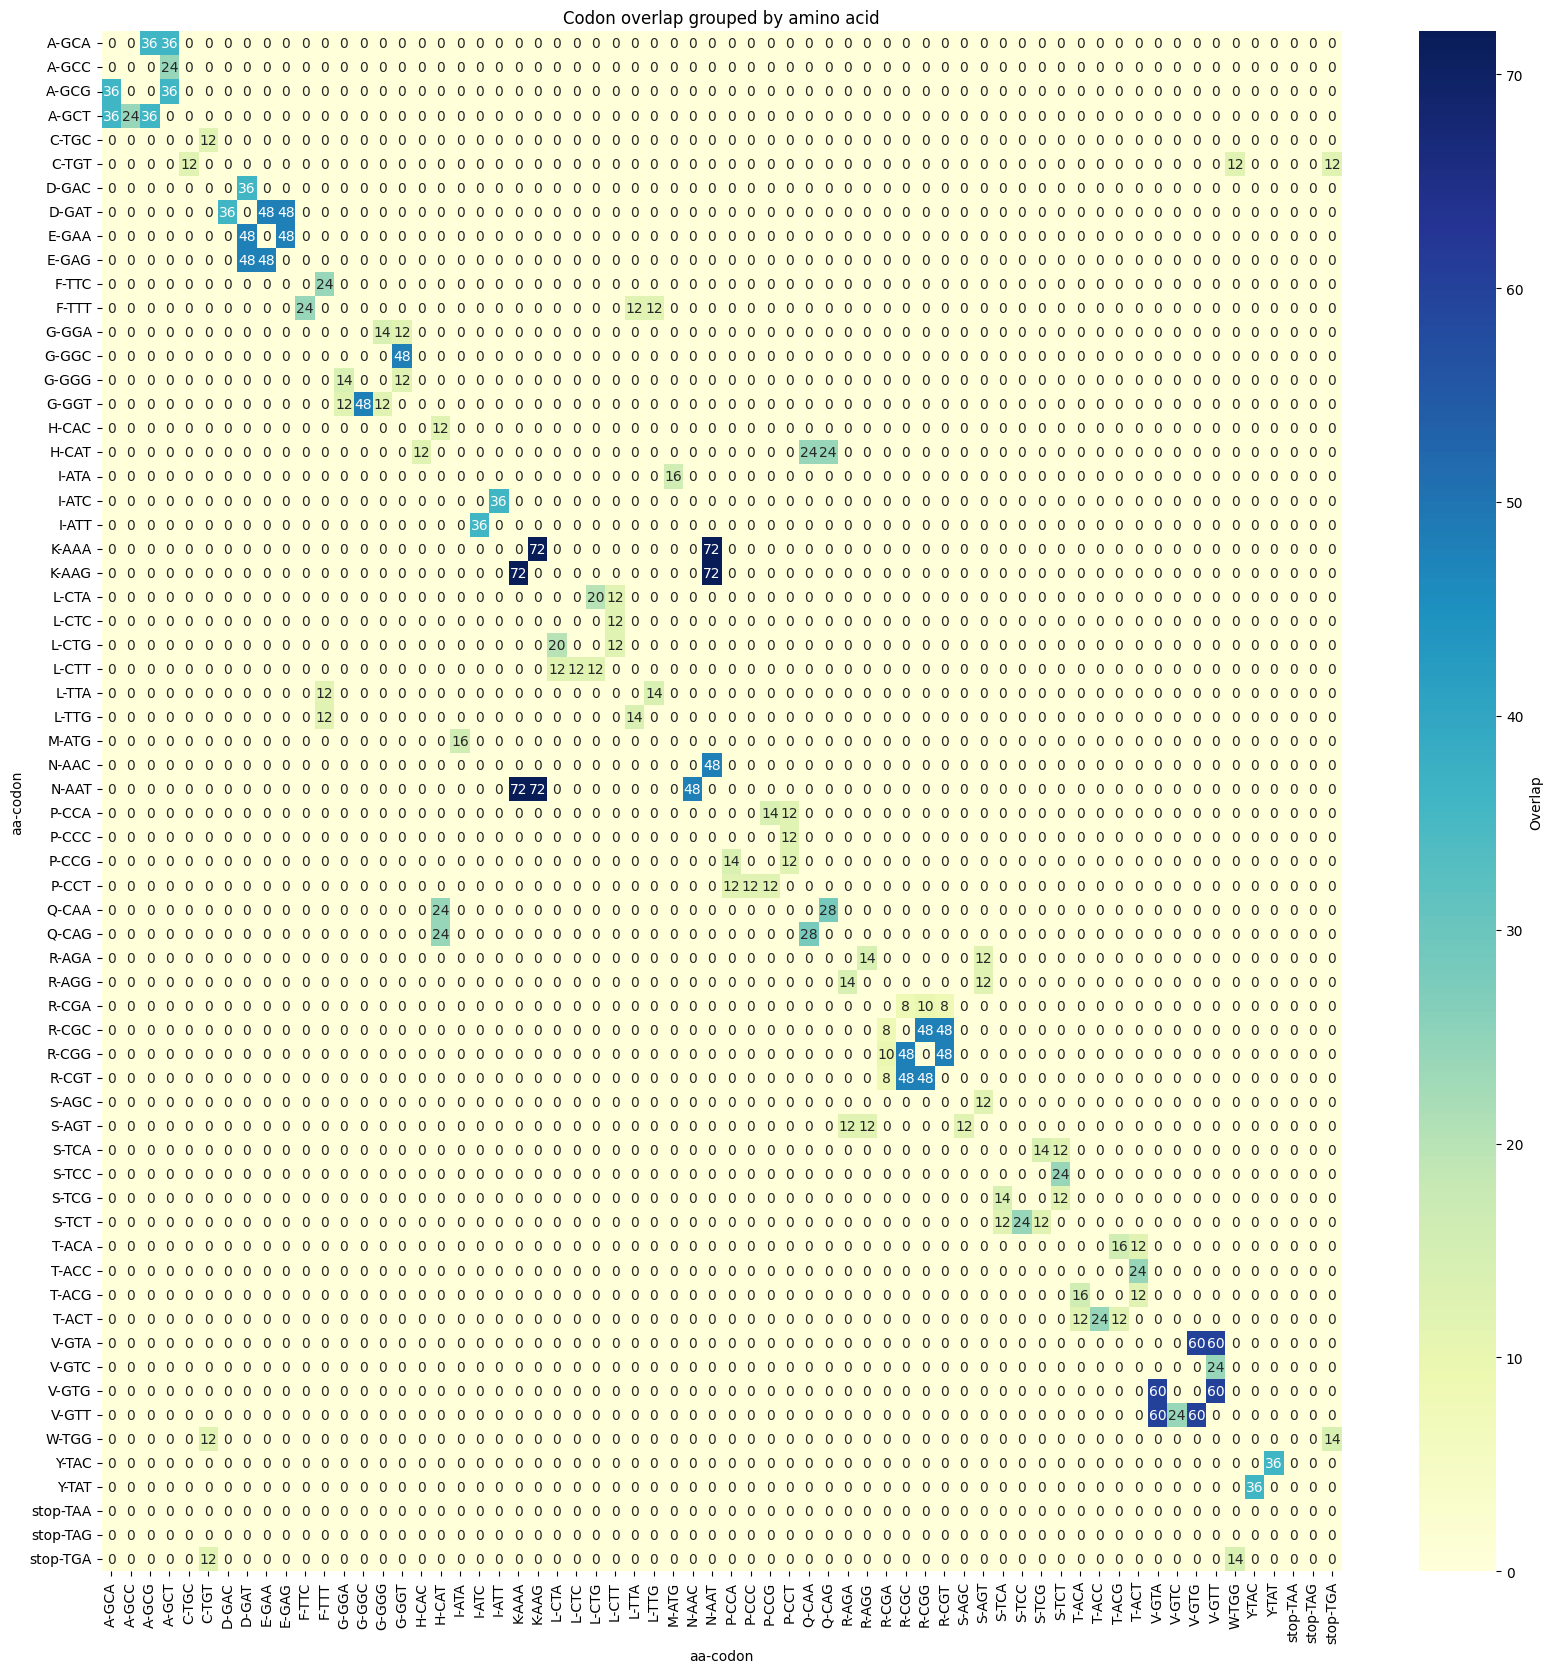

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(display_heatmap_df_sorted,fmt="d",annot=True, cmap="YlGnBu", cbar_kws={'label': 'Overlap'})
plt.title("Codon overlap grouped by amino acid")
plt.xlabel("aa-codon")
plt.ylabel("aa-codon")
plt.show()


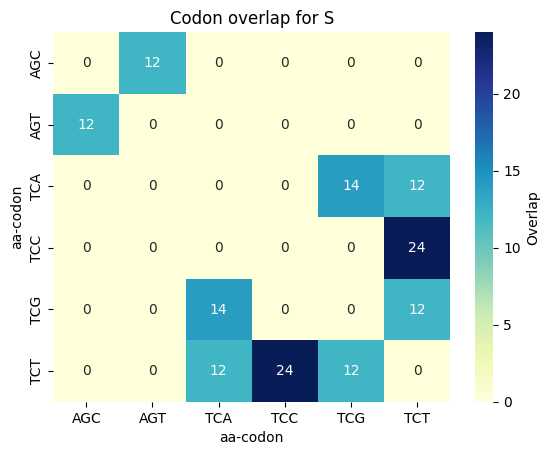

In [ ]:
aa = "S"
sns.heatmap(display_heatmap_df_sorted.loc[aa,aa], annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Overlap'})
plt.title(f"Codon overlap for {aa}")
plt.xlabel("aa-codon")
plt.ylabel("aa-codon")
plt.show()


In [160]:
CodOvMatrix['sum'] = CodOvMatrix.sum(axis=1)
tRNA_anticodon_shared = CodOvMatrix["sum"].to_dict()
tRNA_anticodon_shared

{'AAA': 144,
 'AAC': 48,
 'AAG': 144,
 'AAT': 192,
 'ACA': 28,
 'ACC': 24,
 'ACG': 28,
 'ACT': 48,
 'AGA': 26,
 'AGC': 12,
 'AGG': 26,
 'AGT': 36,
 'ATA': 16,
 'ATC': 36,
 'ATG': 16,
 'ATT': 36,
 'CAA': 52,
 'CAC': 12,
 'CAG': 52,
 'CAT': 60,
 'CCA': 26,
 'CCC': 12,
 'CCG': 26,
 'CCT': 36,
 'CGA': 26,
 'CGC': 104,
 'CGG': 106,
 'CGT': 104,
 'CTA': 32,
 'CTC': 12,
 'CTG': 32,
 'CTT': 36,
 'GAA': 96,
 'GAC': 36,
 'GAG': 96,
 'GAT': 132,
 'GCA': 72,
 'GCC': 24,
 'GCG': 72,
 'GCT': 96,
 'GGA': 26,
 'GGC': 48,
 'GGG': 26,
 'GGT': 72,
 'GTA': 120,
 'GTC': 24,
 'GTG': 120,
 'GTT': 144,
 'TAA': 0,
 'TAC': 36,
 'TAG': 0,
 'TAT': 36,
 'TCA': 26,
 'TCC': 24,
 'TCG': 26,
 'TCT': 48,
 'TGA': 26,
 'TGC': 12,
 'TGG': 26,
 'TGT': 36,
 'TTA': 26,
 'TTC': 24,
 'TTG': 26,
 'TTT': 48}

In [161]:
codon_tRNA_count

{'GCA': 3,
 'GCC': 2,
 'GCG': 3,
 'GCT': 5,
 'TGC': 1,
 'TGT': 2,
 'GAC': 3,
 'GAT': 7,
 'GAA': 4,
 'GAG': 4,
 'TTC': 2,
 'TTT': 3,
 'GGA': 2,
 'GGC': 4,
 'GGG': 2,
 'GGT': 5,
 'CAC': 1,
 'CAT': 3,
 'ATA': 8,
 'ATC': 3,
 'ATT': 3,
 'AAA': 6,
 'AAG': 6,
 'CTA': 5,
 'CTC': 1,
 'CTG': 5,
 'CTT': 2,
 'TTA': 2,
 'TTG': 2,
 'ATG': 8,
 'AAC': 4,
 'AAT': 10,
 'CCA': 2,
 'CCC': 1,
 'CCG': 2,
 'CCT': 2,
 'CAA': 4,
 'CAG': 4,
 'AGA': 2,
 'AGG': 2,
 'CGA': 5,
 'CGC': 4,
 'CGG': 5,
 'CGT': 4,
 'TAA': 0,
 'TAG': 0,
 'TGA': 2,
 'AGC': 1,
 'AGT': 2,
 'TCA': 2,
 'TCC': 2,
 'TCG': 2,
 'TCT': 3,
 'ACA': 3,
 'ACC': 2,
 'ACG': 3,
 'ACT': 3,
 'GTA': 5,
 'GTC': 2,
 'GTG': 5,
 'GTT': 7,
 'TGG': 2,
 'TAC': 3,
 'TAT': 3}